##Домашняя работа 1 Рекомендации на основе содержания

##Датасет MovieLens

In [197]:
import pandas as pd
import numpy as np
from collections import Counter
from datetime import datetime
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

In [198]:
# загрузим данные
!wget 'https://files.grouplens.org/datasets/movielens/ml-latest-small.zip'

--2025-01-25 16:55:43--  https://files.grouplens.org/datasets/movielens/ml-latest-small.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.65.152
Connecting to files.grouplens.org (files.grouplens.org)|128.101.65.152|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 978202 (955K) [application/zip]
Saving to: ‘ml-latest-small.zip.3’

ml-latest-small.zip 100%[===================>] 955.28K  2.44MB/s    in 0.4s    

2025-01-25 16:55:43 (2.44 MB/s) - ‘ml-latest-small.zip.3’ saved [978202/978202]



In [199]:
# распакуем
import zipfile

with zipfile.ZipFile('/content/ml-latest-small.zip', 'r') as zip_ref:
    zip_ref.extractall('unpacked_files')

In [200]:
# прочитаем
links = pd.read_csv('/content/unpacked_files/ml-latest-small/links.csv')
movies = pd.read_csv('/content/unpacked_files/ml-latest-small/movies.csv')
ratings = pd.read_csv('/content/unpacked_files/ml-latest-small/ratings.csv')
tags = pd.read_csv('/content/unpacked_files/ml-latest-small/tags.csv')

###Посмотрим, что мы имеем

In [201]:
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [202]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [203]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [204]:
# посмотрим на теги
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


###Пользователи

In [205]:
grouped_users = tags['userId'].value_counts()
grouped_users[:10]

,count
userId,
474,1507
567,432
62,370
599,323
477,280
424,273
537,100
125,48
357,45


In [206]:
# посмотрим сколько их
len(grouped_users)

58

In [207]:
# посмотрим на медиану и среднее значение
grouped_users.median(), grouped_users.mean()

(4.0, 63.5)

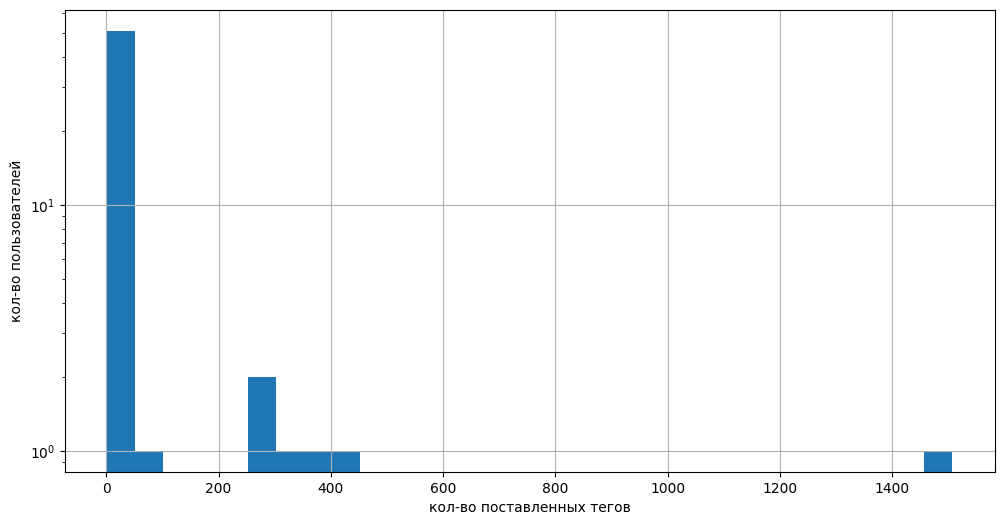

In [208]:
# посмотрим как это все выглядит в логарифмической системе координат
plt.figure(figsize=(12, 6))
grouped_users.hist(bins=30, log=True)
plt.xlabel('кол-во поставленных тегов')
plt.ylabel('кол-во пользователей');

###Фильмы

In [209]:
# посмотрим на фильмы
grouped_movies = tags['movieId'].value_counts()
# добавим для наглядности названия и жанры
pd.DataFrame(grouped_movies).join(movies.set_index('movieId'), on='movieId')

,count,title,genres
movieId,,,
296,181,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
2959,54,Fight Club (1999),Action|Crime|Drama|Thriller
924,41,2001: A Space Odyssey (1968),Adventure|Drama|Sci-Fi
293,35,Léon: The Professional (a.k.a. The Professiona...,Action|Crime|Drama|Thriller
7361,34,Eternal Sunshine of the Spotless Mind (2004),Drama|Romance|Sci-Fi
...,...,...,...
3307,1,City Lights (1931),Comedy|Drama|Romance
3310,1,"Kid, The (1921)",Comedy|Drama
3317,1,Wonder Boys (2000),Comedy|Drama


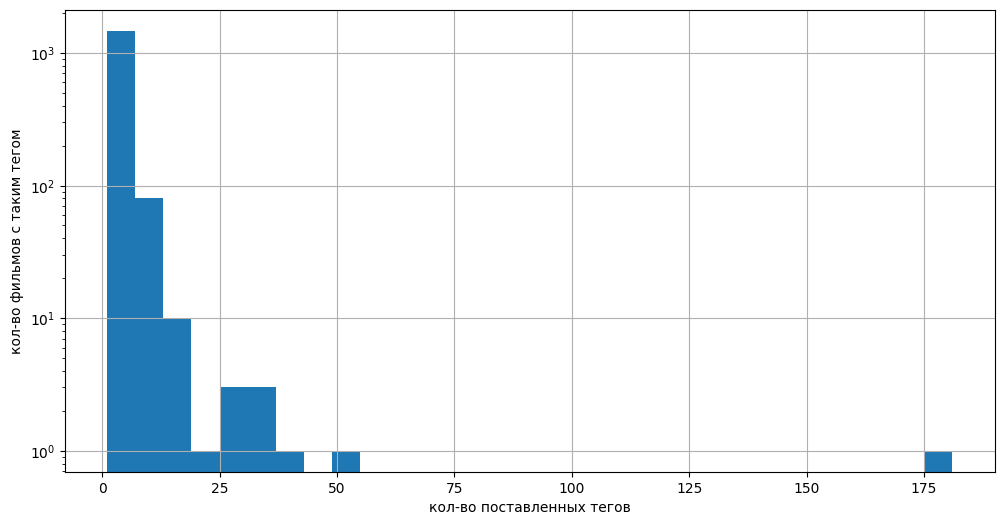

In [210]:
# посмотрим визуально в логарифмической системе координат
plt.figure(figsize=(12, 6))
grouped_movies.hist(bins=30, log=True)
plt.xlabel('кол-во поставленных тегов')
plt.ylabel('кол-во фильмов с таким тегом');

In [211]:
# найдем среднее значение и медиану
grouped_movies.mean(), grouped_movies.median()

(2.3428753180661577, 1.0)

### Дата

In [212]:
# посмотрим на дату и преобразуем ее
tags['dt'] = tags['timestamp'].apply(lambda t: datetime.fromtimestamp(t))
tags.head()

,userId,movieId,tag,timestamp,dt
0,2,60756,funny,1445714994,2015-10-24 19:29:54
1,2,60756,Highly quotable,1445714996,2015-10-24 19:29:56
2,2,60756,will ferrell,1445714992,2015-10-24 19:29:52
3,2,89774,Boxing story,1445715207,2015-10-24 19:33:27
4,2,89774,MMA,1445715200,2015-10-24 19:33:20


In [213]:
tags['year'] = tags['dt'].dt.year
tags['month'] = tags['dt'].dt.month

In [214]:
tags['year_month'] = tags['year'].astype(str) + '-' + tags['month'].astype(str)
tags.head()

,userId,movieId,tag,timestamp,dt,year,month,year_month
0,2,60756,funny,1445714994,2015-10-24 19:29:54,2015,10,2015-10
1,2,60756,Highly quotable,1445714996,2015-10-24 19:29:56,2015,10,2015-10
2,2,60756,will ferrell,1445714992,2015-10-24 19:29:52,2015,10,2015-10
3,2,89774,Boxing story,1445715207,2015-10-24 19:33:27,2015,10,2015-10
4,2,89774,MMA,1445715200,2015-10-24 19:33:20,2015,10,2015-10


In [215]:
grouped_date = tags['year_month'].value_counts()[:30]
grouped_date[:30]

,count
year_month,
2006-1,1462
2018-5,670
2017-6,323
2016-3,280
2015-2,109
2018-6,101
2009-5,87
2010-1,62
2009-6,52


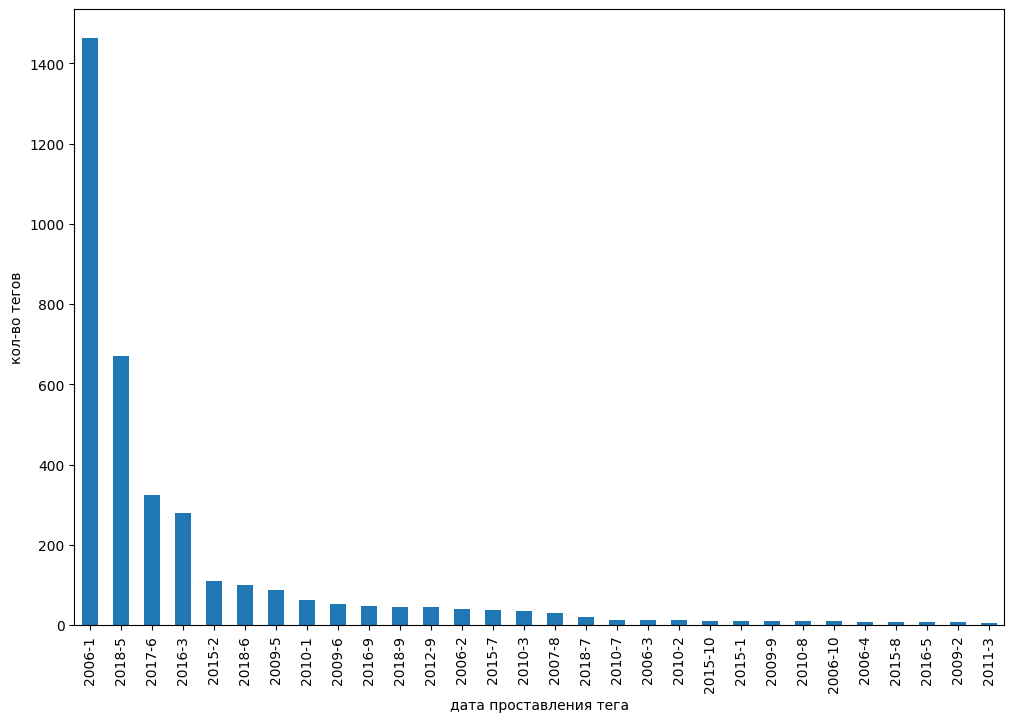

In [216]:
plt.figure(figsize=(12, 8))
grouped_date.plot.bar()
plt.xlabel('дата проставления тега')
plt.ylabel('кол-во тегов');

### Жанры

In [217]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [218]:
# рассчитаем количество жанров на каждом фильме
movies['num_generes'] = movies['genres'].apply(lambda x: len(x.split('|')))
movies.head()

,movieId,title,genres,num_generes
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5
1,2,Jumanji (1995),Adventure|Children|Fantasy,3
2,3,Grumpier Old Men (1995),Comedy|Romance,2
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,3
4,5,Father of the Bride Part II (1995),Comedy,1


In [219]:
# отсортируем
movies.sort_values('num_generes', ascending=False).head()

,movieId,title,genres,num_generes
7441,81132,Rubber (2010),Action|Adventure|Comedy|Crime|Drama|Film-Noir|...,10
5556,26701,Patlabor: The Movie (Kidô keisatsu patorebâ: T...,Action|Animation|Crime|Drama|Film-Noir|Mystery...,8
6626,56152,Enchanted (2007),Adventure|Animation|Children|Comedy|Fantasy|Mu...,7
2250,2987,Who Framed Roger Rabbit? (1988),Adventure|Animation|Children|Comedy|Crime|Fant...,7
5819,32031,Robots (2005),Adventure|Animation|Children|Comedy|Fantasy|Sc...,7


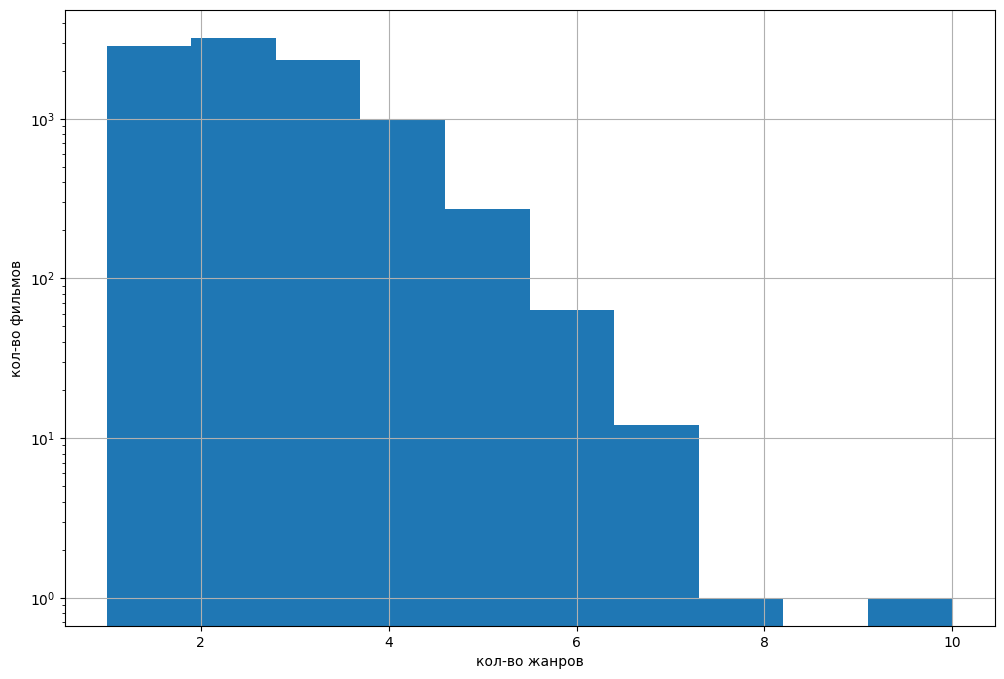

In [220]:
# посмотрим визуально в логарифмической системе координат
plt.figure(figsize=(12, 8))
movies['num_generes'].hist(bins=10, log=True)
plt.xlabel('кол-во жанров')
plt.ylabel('кол-во фильмов');

In [221]:
# рассчитаем среднее значение и медиану
np.mean(movies['num_generes']), np.median(movies['num_generes'])

(2.2668856497639087, 2.0)

##Построение рекомендаций на основании средних оценок пользователя фильмов

In [43]:
# загрузим библиотеки
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import tensorflow as tf
from tensorflow import keras
from keras import backend as K
from tensorflow.keras import layers as L
from keras import initializers

In [28]:
# соберем датасет из user id, movie title, rating
merged_dataset = pd.merge(ratings, movies, how='inner', on='movieId')
dataset = merged_dataset[['userId', 'title', 'rating']]
dataset.head()

,userId,title,rating
0,1,Toy Story (1995),4.0
1,1,Grumpier Old Men (1995),4.0
2,1,Heat (1995),4.0
3,1,Seven (a.k.a. Se7en) (1995),5.0
4,1,"Usual Suspects, The (1995)",5.0


Проверим и закодируем наши данные



In [29]:
# позьзователи
user_enc = LabelEncoder()
dataset['user'] = user_enc.fit_transform(dataset['userId'].values)
n_users = dataset['user'].nunique()

# фильмы
item_enc = LabelEncoder()
dataset['movie'] = item_enc.fit_transform(dataset['title'].values)
n_movies = dataset['movie'].nunique()

# рейтинги
item_rat = LabelEncoder()
dataset['rating'] = item_rat.fit_transform(dataset['rating'].values)
min_rating = min(dataset['rating'])
max_rating = max(dataset['rating'])

# смотрим, что получилось
n_users, n_movies, min_rating, max_rating

<ipython-input-29-df1fe697f55c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['user'] = user_enc.fit_transform(dataset['userId'].values)
<ipython-input-29-df1fe697f55c>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['movie'] = item_enc.fit_transform(dataset['title'].values)
<ipython-input-29-df1fe697f55c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

(610, 9719, 0, 9)

In [30]:
# в итоге имеем
dataset.head()

,userId,title,rating,user,movie
0,1,Toy Story (1995),7,0,8871
1,1,Grumpier Old Men (1995),7,0,3661
2,1,Heat (1995),7,0,3845
3,1,Seven (a.k.a. Se7en) (1995),9,0,7523
4,1,"Usual Suspects, The (1995)",9,0,9119


In [92]:
# разобъем данные на обучающую и тестовуб выборку
X = dataset[['user', 'movie']].values
y = dataset['rating'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [77]:
# нормализовывать данные не стоит
#from sklearn.preprocessing import StandardScaler

#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_train

array([[ 0.99830454,  0.95358781],
       [-0.00295088, -1.00480164],
       [-1.47474164, -0.1659516 ],
       ...,
       [ 0.83963565,  1.1498916 ],
       [-1.75378003, -0.95366969],
       [-1.22305995,  0.15049438]])

In [93]:
# разделим на 2 отдельных слоя
X_train_array = [X_train[:, 0], X_train[:, 1]]
X_test_array = [X_test[:, 0], X_test[:, 1]]
X_train, X_train_array, X_train_array[0].shape

(array([[ 508, 7476],
        [ 325, 1999],
        [  56, 4345],
        ...,
        [ 479, 8025],
        [   5, 2142],
        [ 102, 5230]]),
 [array([508, 325,  56, ..., 479,   5, 102]),
  array([7476, 1999, 4345, ..., 8025, 2142, 5230])],
 (80668,))

Построим нашу умную (и уже немного знакомую) сеть

In [79]:
# уменьшаем скорость обучения
from keras import callbacks
reduce_lr = callbacks.ReduceLROnPlateau(monitor='val_sparse_categorical_accuracy',
                                        factor=0.75,
                                        patience=2,
                                        verbose=1,
                                        mode='auto',
                                        min_delta=0.00001,
                                        cooldown=2,
                                        min_lr=1e-5
                                       )

In [94]:
# построим нашу модель
try:
  K.clear_session()
  del model
except:
  pass

# зададим размер векторного пространства
n_factors = 256

# наш входной слой пользователей
user = L.Input(shape=(1,))

# уровень встраивания для n_factors пользователей
u = L.Embedding(n_users, n_factors,
                embeddings_initializer=initializers.RandomNormal(stddev=0.01),
                embeddings_regularizer = tf.keras.regularizers.l2(1e-6))(user)
u = L.Reshape((n_factors,))(u)

# наш входной слой для фильмов
movie = L.Input(shape=(1,))

# слой встраивания для n_factors фильмов
m = L.Embedding(n_movies, n_factors,
                embeddings_initializer=initializers.RandomNormal(stddev=0.01),
                embeddings_regularizer=tf.keras.regularizers.l2(1e-6))(movie)
m = L.Reshape((n_factors,))(m)

# объединим пользователей и фильмы
merged = L.Concatenate()([u, m])

# добавим полносвязные слои
out = L.Dense(512, activation='relu')(merged)
out = L.BatchNormalization()(out)
out = L.Dense(256, activation='relu')(out)
out = L.BatchNormalization()(out)
out = L.Dense(128, activation='relu')(out)
out = L.BatchNormalization()(out)
out = L.Dense(64, activation='softmax')(out)
out = L.BatchNormalization()(out)
out = L.Dense(32, activation='softmax')(out)
out = L.Dense(10, activation='softmax')(out)

# соберем модель
model = keras.Model(inputs=[user, movie], outputs=out, name='My_model')


In [95]:
# посмотрим на модель
model.summary()

Model: "My_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 1)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_1             │ (None, 1)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding (Embedding)     │ (None, 1, 256)         │        156,160 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_1 (Embedding)   │ (None, 1, 256)         │      2,488,064 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ reshape (Reshape)         │ (None, 256)            │              0 │ embedding[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ reshape_1 (Reshape)       │ (None, 256)            │              0 │ embedding_1[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 512)            │              0 │ reshape[0][0],         │
│                           │                        │                │ reshape_1[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 512)            │        262,656 │ concatenate[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 512)            │          2,048 │ dense[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 256)            │        131,328 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 256)            │          1,024 │ dense_1[0][0]          │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 128)            │         32,896 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 128)            │            512 │ dense_2[0][0]          │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_3 (Dense)           │ (None, 64)             │          8,256 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 64)             │            256 │ dense_3[0][0]          │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_4 (Dense)           │ (None, 32)             │          2,080 │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_5 (Dense)      

 Total params: 3,085,610 (11.77 MB)

 Trainable params: 3,083,690 (11.76 MB)

 Non-trainable params: 1,920 (7.50 KB)

In [96]:
# зададим параметры
loss = keras.losses.SparseCategoricalCrossentropy()
metrics=['sparse_categorical_accuracy']   # для целочисленных меток
epochs = 16
batch_size = 32
learning_rate = 0.001
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

# скомпилируем модель
model.compile(loss=loss, optimizer=optimizer, metrics=metrics)

# обучим модель
model.fit(X_train_array, y_train,
          batch_size=batch_size,
          epochs=epochs,
          #callbacks=None,
          callbacks=[reduce_lr],
          validation_data=(X_test_array, y_test)
)

Epoch 1/16
2521/2521 ━━━━━━━━━━━━━━━━━━━━ 115s 44ms/step - loss: 2.0125 - sparse_categorical_accuracy: 0.2679 - val_loss: 1.8268 - val_sparse_categorical_accuracy: 0.2948 - learning_rate: 0.0010
Epoch 2/16
2521/2521 ━━━━━━━━━━━━━━━━━━━━ 134s 41ms/step - loss: 1.7869 - sparse_categorical_accuracy: 0.3093 - val_loss: 1.7476 - val_sparse_categorical_accuracy: 0.3150 - learning_rate: 0.0010
Epoch 3/16
2521/2521 ━━━━━━━━━━━━━━━━━━━━ 143s 41ms/step - loss: 1.6938 - sparse_categorical_accuracy: 0.3386 - val_loss: 1.7188 - val_sparse_categorical_accuracy: 0.3289 - learning_rate: 0.0010
Epoch 4/16
2521/2521 ━━━━━━━━━━━━━━━━━━━━ 143s 41ms/step - loss: 1.6394 - sparse_categorical_accuracy: 0.3572 - val_loss: 1.6993 - val_sparse_categorical_accuracy: 0.3363 - learning_rate: 0.0010
Epoch 5/16
2521/2521 ━━━━━━━━━━━━━━━━━━━━ 140s 41ms/step - loss: 1.5937 - sparse_categorical_accuracy: 0.3757 - val_loss: 1.6972 - val_sparse_categorical_accuracy: 0.3402 - learning_rate: 0.0010
Epoch 6/16
2521/2521 ━━━━

In [107]:
# проверим
from sklearn.metrics import accuracy_score

predict_x = model.predict(X_test_array)
classes_x = np.argmax(predict_x, axis=1)

test_acc = accuracy_score(y_test, classes_x)
print('\nTest_acc =', test_acc)
if test_acc > 0.8:
    print('Это победа!')
else:
    print('пичалька)')

631/631 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step

Test_acc = 0.3185243950813169
пичалька)


##Добавим информацию о жанрах

In [222]:
merged_dataset.head()

,userId,movieId,rating,timestamp,title,genres,num_generes
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance,2
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller,3
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,2
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,3


In [223]:
dataset = merged_dataset[['userId', 'title', 'rating', 'genres', 'num_generes']]
dataset.head()

,userId,title,rating,genres,num_generes
0,1,Toy Story (1995),4.0,Adventure|Animation|Children|Comedy|Fantasy,5
1,1,Grumpier Old Men (1995),4.0,Comedy|Romance,2
2,1,Heat (1995),4.0,Action|Crime|Thriller,3
3,1,Seven (a.k.a. Se7en) (1995),5.0,Mystery|Thriller,2
4,1,"Usual Suspects, The (1995)",5.0,Crime|Mystery|Thriller,3


In [224]:
# преобразуем genres

# спасибо за красивый код в лекциях!
def change_string(s):
    return ' '.join(s.replace(' ', '').replace('-', '').split('|'))

movie_genres = [change_string(g) for g in movies.genres.values]
movie_genres[:10]

['Adventure Animation Children Comedy Fantasy',
 'Adventure Children Fantasy',
 'Comedy Romance',
 'Comedy Drama Romance',
 'Comedy',
 'Action Crime Thriller',
 'Comedy Romance',
 'Adventure Children',
 'Action',
 'Action Adventure Thriller']

In [225]:
dataset['genres'] = dataset['genres'].apply(lambda s: change_string(s))
dataset.head(10)

<ipython-input-225-1b18e1c6019c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['genres'] = dataset['genres'].apply(lambda s: change_string(s))


,userId,title,rating,genres,num_generes
0,1,Toy Story (1995),4.0,Adventure Animation Children Comedy Fantasy,5
1,1,Grumpier Old Men (1995),4.0,Comedy Romance,2
2,1,Heat (1995),4.0,Action Crime Thriller,3
3,1,Seven (a.k.a. Se7en) (1995),5.0,Mystery Thriller,2
4,1,"Usual Suspects, The (1995)",5.0,Crime Mystery Thriller,3
5,1,From Dusk Till Dawn (1996),3.0,Action Comedy Horror Thriller,4
6,1,Bottle Rocket (1996),5.0,Adventure Comedy Crime Romance,4
7,1,Braveheart (1995),4.0,Action Drama War,3
8,1,Rob Roy (1995),5.0,Action Drama Romance War,4
9,1,Canadian Bacon (1995),5.0,Comedy War,2


Далее предлагаю повторяющиеся жанры записывать в виде отдельных строк

In [258]:
df = dataset.copy()
df

,userId,title,rating,genres,num_generes
0,1,Toy Story (1995),4.0,Adventure Animation Children Comedy Fantasy,5
1,1,Grumpier Old Men (1995),4.0,Comedy Romance,2
2,1,Heat (1995),4.0,Action Crime Thriller,3
3,1,Seven (a.k.a. Se7en) (1995),5.0,Mystery Thriller,2
4,1,"Usual Suspects, The (1995)",5.0,Crime Mystery Thriller,3
...,...,...,...,...,...
100831,610,Split (2017),4.0,Drama Horror Thriller,3
100832,610,John Wick: Chapter Two (2017),5.0,Action Crime Thriller,3
100833,610,Get Out (2017),5.0,Horror,1
100834,610,Logan (2017),5.0,Action SciFi,2


In [252]:
# попробую написать для этого функцию
def change_string_genres(df=df):

  for index, row in df.iterrows():
    #print(index, row)
    print(row['genres'].split()[0], row['num_generes'])
    df.at[index, 'genres'] = row['genres'].split()[0]


    if index == 2:
      break

  return

In [253]:
change_string_genres(df)

Adventure 5
Comedy 2
Action 3


In [254]:
df.head()

,userId,title,rating,genres,num_generes
0,1,Toy Story (1995),4.0,Adventure,5
1,1,Grumpier Old Men (1995),4.0,Comedy,2
2,1,Heat (1995),4.0,Action,3
3,1,Seven (a.k.a. Se7en) (1995),5.0,Mystery Thriller,2
4,1,"Usual Suspects, The (1995)",5.0,Crime Mystery Thriller,3


##Рекомендации к фильму

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors

In [ ]:
movies.head()

,movieId,title,genres,num_generes
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5
1,2,Jumanji (1995),Adventure|Children|Fantasy,3
2,3,Grumpier Old Men (1995),Comedy|Romance,2
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,3
4,5,Father of the Bride Part II (1995),Comedy,1


In [ ]:
def change_string(s):
    return ' '.join(s.replace(' ', '').replace('-', '').split('|'))

In [ ]:
movie_genres = [change_string(g) for g in movies.genres.values]
movie_genres[:10]

['Adventure Animation Children Comedy Fantasy',
 'Adventure Children Fantasy',
 'Comedy Romance',
 'Comedy Drama Romance',
 'Comedy',
 'Action Crime Thriller',
 'Comedy Romance',
 'Adventure Children',
 'Action',
 'Action Adventure Thriller']

### Преобразование данных в векторы

In [ ]:
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(movie_genres)
X_train_tfidf

<9742x20 sparse matrix of type '<class 'numpy.float64'>'
	with 22084 stored elements in Compressed Sparse Row format>

In [ ]:
pd.DataFrame(X_train_tfidf.toarray(), columns=tfidf.get_feature_names_out())

,action,adventure,animation,children,comedy,crime,documentary,drama,fantasy,filmnoir,horror,imax,musical,mystery,nogenreslisted,romance,scifi,thriller,war,western
0,0.000000,0.416846,0.516225,0.504845,0.267586,0.0,0.0,0.000000,0.482990,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.000000,0.512361,0.000000,0.620525,0.000000,0.0,0.0,0.000000,0.593662,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.000000,0.000000,0.000000,0.000000,0.570915,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.821009,0.0,0.0,0.0,0.0
3,0.000000,0.000000,0.000000,0.000000,0.505015,0.0,0.0,0.466405,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.726241,0.0,0.0,0.0,0.0
4,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,0.436010,0.000000,0.614603,0.000000,0.318581,0.0,0.0,0.000000,0.575034,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
9738,0.000000,0.000000,0.682937,0.000000,0.354002,0.0,0.0,0.000000,0.638968,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
9739,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
9740,0.578606,0.000000,0.815607,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


### Найдем ближайших соседей

In [ ]:
neigh = NearestNeighbors(n_neighbors=7, metric='euclidean')
neigh.fit(X_train_tfidf)

NearestNeighbors(metric='euclidean', n_neighbors=7)

In [ ]:
test = change_string("Adventure|Comedy|Fantasy|Documentary")

X_tfidf = tfidf.transform([test])

res = neigh.kneighbors(X_tfidf, return_distance=True)

In [ ]:
res

(array([[0.38758619, 0.56525059, 0.58114553, 0.65617877, 0.65617877,
         0.66834044, 0.66834044]]),
 array([[8014, 5836, 8161, 4853, 7597, 5636, 5627]]))

In [ ]:
movies.iloc[res[1][0]]

,movieId,title,genres,num_generes
8014,97757,'Hellboy': The Seeds of Creation (2004),Action|Adventure|Comedy|Documentary|Fantasy,5
5836,32314,Incident at Loch Ness (2004),Adventure|Comedy|Documentary,3
8161,102590,Darkon (2006),Documentary|Fantasy,2
4853,7256,Touching the Void (2003),Adventure|Documentary,2
7597,86593,African Cats (2011),Adventure|Documentary,2
5636,27368,Asterix & Obelix: Mission Cleopatra (Astérix &...,Adventure|Comedy|Fantasy,3
5627,27251,"10th Kingdom, The (2000)",Adventure|Comedy|Fantasy,3


In [ ]:
movies_with_tags = movies.merge(tags, on='movieId')
movies_with_tags.head()

,movieId,title,genres,num_generes,userId,tag,timestamp,dt,year,month,year_month
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,336,pixar,1139045764,2006-02-04 09:36:04,2006,2,2006-2
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,474,pixar,1137206825,2006-01-14 02:47:05,2006,1,2006-1
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,567,fun,1525286013,2018-05-02 18:33:33,2018,5,2018-5
3,2,Jumanji (1995),Adventure|Children|Fantasy,3,62,fantasy,1528843929,2018-06-12 22:52:09,2018,6,2018-6
4,2,Jumanji (1995),Adventure|Children|Fantasy,3,62,magic board game,1528843932,2018-06-12 22:52:12,2018,6,2018-6


### Преобразуем теги в векторы

In [ ]:
movies_with_tags[movies_with_tags.title == 'Toy Story (1995)']

,movieId,title,genres,num_generes,userId,tag,timestamp,dt,year,month,year_month
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,336,pixar,1139045764,2006-02-04 09:36:04,2006,2,2006-2
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,474,pixar,1137206825,2006-01-14 02:47:05,2006,1,2006-1
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,567,fun,1525286013,2018-05-02 18:33:33,2018,5,2018-5


In [ ]:
movies_with_tags.tag.unique()

array(['pixar', 'fun', 'fantasy', ..., 'star wars', 'gintama', 'remaster'],
      dtype=object)

In [ ]:
movies_with_tags.tag.unique().shape

(1589,)

In [ ]:
movies_with_tags.dropna(inplace=True)

In [ ]:
movies_with_tags.title.unique().shape

(1572,)

In [ ]:
def change_string(s):
    return str(s).replace(' ', '').replace('-', '').lower()

tag_strings = []
movies = []

for movie, group in tqdm(movies_with_tags.groupby('title')):
    tag_strings.append(' '.join([change_string(s) for s in group.tag.values]))
    movies.append(movie)

  0%|          | 0/1572 [00:00<?, ?it/s]

In [ ]:
tag_strings[:10]

['artistic funny humorous inspiring intelligent quirky romance zooeydeschanel',
 'lawyers',
 'creepy suspense',
 'shakespearesortof',
 'dogs remake',
 'disney',
 'terrorism',
 'court claustrophobic confrontational earnest gooddialogue greatscreenplay gritty motivational thoughtprovoking',
 'stranded',
 'markruffalo']

In [ ]:
movies_with_tags[movies_with_tags['title'] == '(500) Days of Summer (2009)']

,movieId,title,genres,num_generes,userId,tag,timestamp,dt,year,month,year_month
3078,69757,(500) Days of Summer (2009),Comedy|Drama|Romance,3,477,artistic,1279956134,2010-07-24 07:22:14,2010,7,2010-7
3079,69757,(500) Days of Summer (2009),Comedy|Drama|Romance,3,477,Funny,1279956141,2010-07-24 07:22:21,2010,7,2010-7
3080,69757,(500) Days of Summer (2009),Comedy|Drama|Romance,3,477,humorous,1279956124,2010-07-24 07:22:04,2010,7,2010-7
3081,69757,(500) Days of Summer (2009),Comedy|Drama|Romance,3,477,inspiring,1279956130,2010-07-24 07:22:10,2010,7,2010-7
3082,69757,(500) Days of Summer (2009),Comedy|Drama|Romance,3,477,intelligent,1279956132,2010-07-24 07:22:12,2010,7,2010-7
3083,69757,(500) Days of Summer (2009),Comedy|Drama|Romance,3,477,quirky,1279956145,2010-07-24 07:22:25,2010,7,2010-7
3084,69757,(500) Days of Summer (2009),Comedy|Drama|Romance,3,477,romance,1279956123,2010-07-24 07:22:03,2010,7,2010-7
3085,69757,(500) Days of Summer (2009),Comedy|Drama|Romance,3,477,Zooey Deschanel,1279956120,2010-07-24 07:22:00,2010,7,2010-7


In [ ]:
tfidf_tag = TfidfVectorizer()
X_train_tfidf_tag = tfidf_tag.fit_transform(tag_strings)
X_train_tfidf_tag

<1572x1472 sparse matrix of type '<class 'numpy.float64'>'
	with 3598 stored elements in Compressed Sparse Row format>

In [ ]:
pd.DataFrame(X_train_tfidf_tag.toarray(), columns=tfidf_tag.get_feature_names_out())

,06oscarnominatedbestmovieanimation,1900s,1920s,1950s,1960s,1970s,1980s,1990s,2001like,2danimation,...,worldwari,worldwarii,writing,wrongfulimprisonment,wry,youngermen,zither,zoekazan,zombies,zooeydeschanel
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.420342
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1568,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1569,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1570,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


### Найдем ближайших соседей

In [ ]:
neigh_tag = NearestNeighbors(n_neighbors=10, p=1)
neigh_tag.fit(X_train_tfidf_tag)

NearestNeighbors(n_neighbors=10, p=1)

In [ ]:
test = 'highschool pixar fun'

X_tfidf_tag = tfidf_tag.transform([test])

res = neigh_tag.kneighbors(X_tfidf_tag, return_distance=True)

In [ ]:
res

(array([[0.95532444, 1.49356676, 1.52685966, 1.70596435, 1.70596435,
         1.70596435, 1.70596435, 1.70596435, 1.70596435, 1.70596435]]),
 array([[1432,  211,  565,  940,  439,  590,  336,  951,  432,  546]]))

In [ ]:
for i in res[1][0]:
    print(movies[i], tag_strings[i])

Toy Story (1995) pixar pixar fun
Bug's Life, A (1998) pixar
Guardians of the Galaxy 2 (2017) fun
Napoleon Dynamite (2004) highschool
Ferris Bueller's Day Off (1986) highschool
Heathers (1989) highschool
Dead Poets Society (1989) highschool highschool
Never Been Kissed (1999) highschool
Fast Times at Ridgemont High (1982) highschool
Grease (1978) highschool
